In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

import pandas as pd

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

In [130]:
data = load_iris()

df_X = pd.DataFrame(data['data'], columns=data['feature_names'])
df_Y = pd.Series(data['target'])

df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [131]:
df_Y.name = 'y'

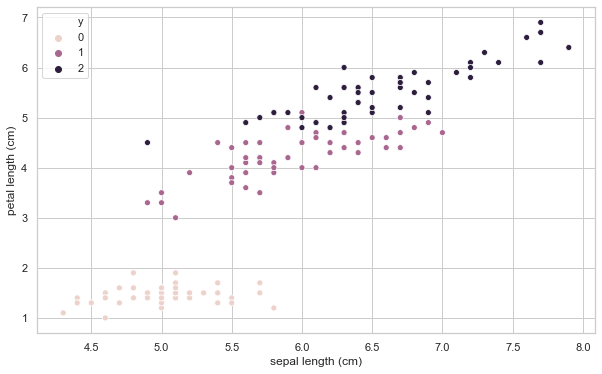

In [132]:
sns.set(style='whitegrid', palette='bright')
plt.figure(figsize=(10, 6))
sns.scatterplot(df_X['sepal length (cm)'], df_X['petal length (cm)'], hue=df_Y)

In [29]:
p = np.linspace(0, 1, 100)
g = p*(1-p)
h = np.zeros_like(p)
h[1:-1] = -p[1:-1]*np.log2(p[1:-1]) - (1-p[1:-1])*np.log2(1-p[1:-1])

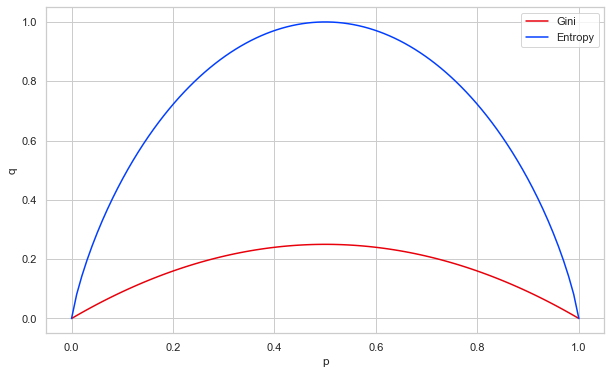

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(p, g, 'r', label='Gini')
plt.plot(p, h, 'b', label='Entropy')
plt.xlabel('p')
plt.ylabel('q')
plt.legend()

In [33]:
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y)

In [45]:
y_test.shape

(38,)

In [134]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.87      0.90        15
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



In [145]:
model = make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=100)
)
model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.20      0.33        15
           2       0.60      1.00      0.75        12

    accuracy                           0.68        38
   macro avg       0.78      0.73      0.64        38
weighted avg       0.80      0.68      0.61        38



C:\Program_Files_Special\Python373\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [49]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.71      0.91      0.80        11
           2       0.89      0.67      0.76        12

    accuracy                           0.87        38
   macro avg       0.87      0.86      0.85        38
weighted avg       0.88      0.87      0.87        38



array([0.        , 0.02011013, 0.00601585, 0.97387402])

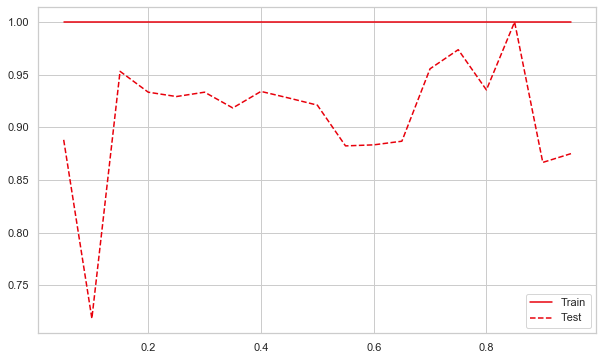

In [73]:
ts = np.linspace(0.05, 0.95, 19)
model = DecisionTreeClassifier()

sc_tr = np.zeros(ts.size)
sc_te = np.zeros(ts.size)

for i, tsi in enumerate(ts):
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=tsi)
        model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
        sc_tr[i] = model.score(X_train, y_train)
        sc_te[i] = model.score(X_test, y_test)
plt.figure(figsize=(10, 6))
plt.plot(ts, sc_tr, 'r', label='Train')
plt.plot(ts, sc_te, 'r--', label='Test')
plt.legend()

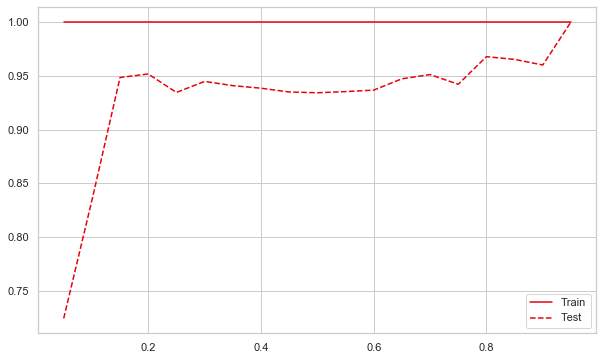

In [74]:
ts = np.linspace(0.05, 0.95, 19)
model = DecisionTreeClassifier()

sc_tr = np.zeros((ts.size, 5))
sc_te = np.zeros((ts.size, 5))

for i, tsi in enumerate(ts):
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=tsi)
        model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
        sc_tr[i, j] = model.score(X_train, y_train)
        sc_te[i, j] = model.score(X_test, y_test)
plt.figure(figsize=(10, 6))
plt.plot(ts, sc_tr.mean(axis=1), 'r', label='Train')
plt.plot(ts, sc_te.mean(axis=1), 'r--', label='Test')
plt.legend()

In [69]:
sc_te.mean(axis=1)

array([0.74685315, 0.89777778, 0.9171875 , 0.92333333, 0.92743363,
       0.94857143, 0.94897959, 0.94065934, 0.94457831, 0.93421053,
       0.95      , 0.94333333, 0.9509434 , 0.94666667, 0.93684211,
       0.94193548, 0.94782609, 0.94666667, 0.95      ])

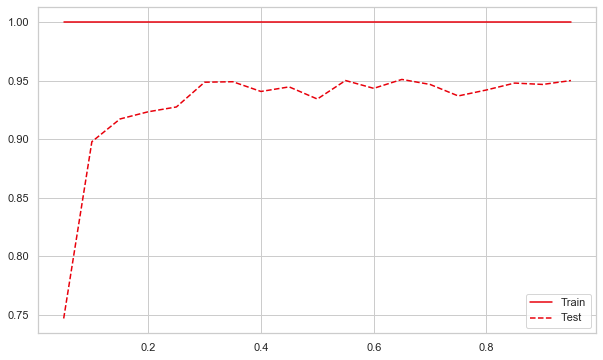

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(ts, sc_tr.mean(axis=1), 'r', label='Train')
plt.plot(ts, sc_te.mean(axis=1), 'r--', label='Test')
plt.legend()

In [119]:
data = load_digits()

df_X = pd.DataFrame(data['data'])
df_Y = pd.Series(data['target'])

df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [120]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y)

In [121]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.77      0.80      0.79        46
           2       0.74      0.90      0.81        29
           3       0.76      0.76      0.76        51
           4       0.96      0.81      0.88        59
           5       0.96      0.85      0.90        52
           6       0.96      0.98      0.97        44
           7       0.82      0.78      0.80        51
           8       0.69      0.77      0.73        35
           9       0.70      0.74      0.72        42

    accuracy                           0.84       450
   macro avg       0.83      0.84      0.83       450
weighted avg       0.84      0.84      0.84       450



In [129]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

model = make_pipeline(
#     MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=3, p=2)
)
model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
print(classification_report(y_test, model.predict(X_test)))

C:\Program_Files_Special\Python373\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        29
           3       1.00      0.98      0.99        51
           4       0.98      0.98      0.98        59
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        44
           7       0.96      1.00      0.98        51
           8       0.97      1.00      0.99        35
           9       1.00      0.95      0.98        42

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [81]:
from sklearn.metrics import confusion_matrix

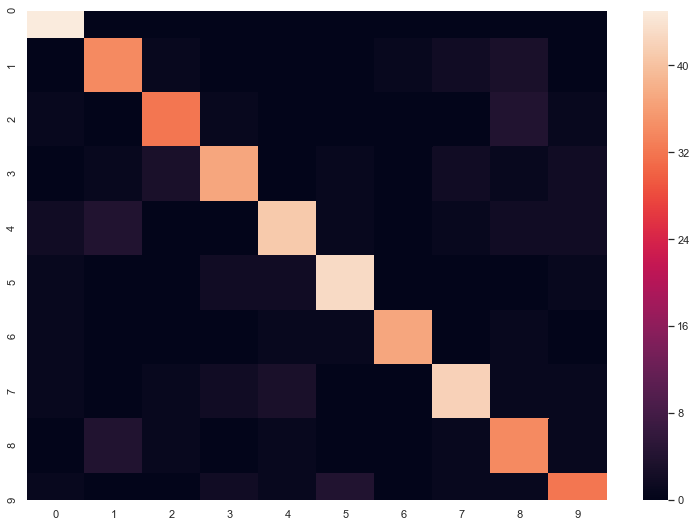

In [84]:
plt.figure(figsize=(13, 9))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))

In [88]:
confusion_matrix(y_test, model.predict(X_test)).T

array([[45,  0,  1,  0,  2,  1,  1,  1,  0,  1],
       [ 0, 34,  0,  1,  4,  0,  0,  0,  4,  0],
       [ 0,  1, 32,  3,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  1, 37,  0,  2,  0,  2,  0,  2],
       [ 0,  0,  0,  0, 41,  2,  1,  3,  1,  1],
       [ 0,  0,  0,  1,  1, 43,  1,  0,  0,  4],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  2,  0,  2,  1,  0,  0, 42,  1,  1],
       [ 0,  3,  4,  1,  2,  0,  1,  1, 34,  1],
       [ 0,  0,  1,  2,  2,  1,  0,  1,  1, 32]], dtype=int64)

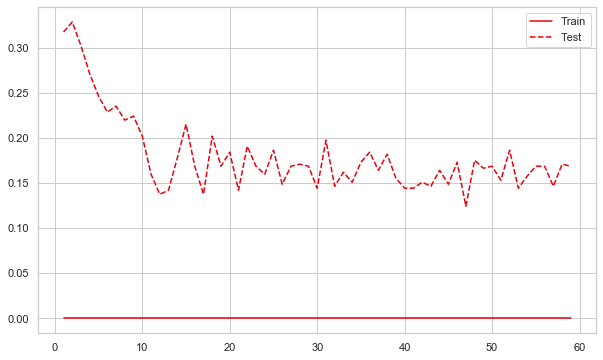

In [111]:
mds = np.arange(1, 60)
# scores_tr = np.zeros_like(mds)
# scores_te = np.zeros_like(mds)

scores_tr, scores_te = [], []

for md in mds:
    model = DecisionTreeClassifier(max_features=md)
    model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
    scores_tr.append(1 - model.score(X_train, y_train))
    scores_te.append(1 - model.score(X_test, y_test))
    
plt.figure(figsize=(10, 6))
plt.plot(mds, scores_tr, 'r', label='Train')
plt.plot(mds, scores_te, 'r--', label='Test')
plt.legend()

In [96]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train.to_numpy().reshape(-1, 1))
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.576837416481069
0.5577777777777778
